# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
uom = "metric"
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={uom}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barcelos
Processing Record 2 of Set 1 | port douglas
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | turpan
Processing Record 5 of Set 1 | oppdal
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | tromso
Processing Record 8 of Set 1 | el granada
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | pontes e lacerda
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | nar'yan-mar
Processing Record 14 of Set 1 | susuman
Processing Record 15 of Set 1 | beau vallon
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | iskateley
Processing Record 22 of Set 1 | sovetskiy
Processing Record 23 

Processing Record 39 of Set 4 | kamba
Processing Record 40 of Set 4 | puerto deseado
Processing Record 41 of Set 4 | mugia
Processing Record 42 of Set 4 | kailua-kona
Processing Record 43 of Set 4 | qaqortoq
Processing Record 44 of Set 4 | todos santos
Processing Record 45 of Set 4 | mil'kovo
Processing Record 46 of Set 4 | nova sintra
Processing Record 47 of Set 4 | new haven
Processing Record 48 of Set 4 | codrington
Processing Record 49 of Set 4 | grand falls-windsor
Processing Record 0 of Set 5 | dalbandin
Processing Record 1 of Set 5 | ajaigarh
Processing Record 2 of Set 5 | eenhana
Processing Record 3 of Set 5 | alpendurada
City not found. Skipping...
Processing Record 4 of Set 5 | salalah
Processing Record 5 of Set 5 | saint marys
Processing Record 6 of Set 5 | hawaiian paradise park
Processing Record 7 of Set 5 | saint-joseph
Processing Record 8 of Set 5 | noshiro
Processing Record 9 of Set 5 | al 'alamayn
City not found. Skipping...
Processing Record 10 of Set 5 | ormara
Proce

Processing Record 32 of Set 8 | conception bay south
Processing Record 33 of Set 8 | patnanungan
Processing Record 34 of Set 8 | saint-denis
Processing Record 35 of Set 8 | bereznik
Processing Record 36 of Set 8 | fastiv
Processing Record 37 of Set 8 | midvagur
Processing Record 38 of Set 8 | hampton bays
Processing Record 39 of Set 8 | mirny
Processing Record 40 of Set 8 | tamanrasset
Processing Record 41 of Set 8 | kolonia town
Processing Record 42 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | alaghsas
Processing Record 45 of Set 8 | blowing point village
City not found. Skipping...
Processing Record 46 of Set 8 | lata
Processing Record 47 of Set 8 | kijang
Processing Record 48 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 49 of Set 8 | tlahualilo de zaragoza
Processing Record 0 of Set 9 | fonte boa
Processing Record 1 of Set 9 | seogwipo
City not found. Skipping...
Processing Record

Processing Record 17 of Set 12 | guerrero negro
Processing Record 18 of Set 12 | tinajo
Processing Record 19 of Set 12 | kerema
Processing Record 20 of Set 12 | yanam
Processing Record 21 of Set 12 | brookings
Processing Record 22 of Set 12 | arteche
Processing Record 23 of Set 12 | gueret
Processing Record 24 of Set 12 | adrar
Processing Record 25 of Set 12 | grand baie
Processing Record 26 of Set 12 | hilo
Processing Record 27 of Set 12 | isle of lewis
City not found. Skipping...
Processing Record 28 of Set 12 | okahandja
Processing Record 29 of Set 12 | vereshchagino
Processing Record 30 of Set 12 | ostersund
Processing Record 31 of Set 12 | la ronge
Processing Record 32 of Set 12 | road town
Processing Record 33 of Set 12 | lusambo
Processing Record 34 of Set 12 | amahai
Processing Record 35 of Set 12 | dipayal
Processing Record 36 of Set 12 | potam
Processing Record 37 of Set 12 | st. john's
Processing Record 38 of Set 12 | balykshi
Processing Record 39 of Set 12 | savave village


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barcelos,41.5388,-8.6151,22.14,85,61,4.19,PT,1694887125
1,port douglas,-16.4833,145.4667,20.97,74,11,6.36,AU,1694887125
2,kodiak,57.7900,-152.4072,8.73,100,100,0.00,US,1694887126
3,turpan,42.9333,89.1667,23.71,26,30,1.03,CN,1694887126
4,oppdal,62.5943,9.6912,6.02,98,100,1.64,NO,1694887126


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,barcelos,41.5388,-8.6151,22.14,85,61,4.19,PT,1694887125
1,port douglas,-16.4833,145.4667,20.97,74,11,6.36,AU,1694887125
2,kodiak,57.7900,-152.4072,8.73,100,100,0.00,US,1694887126
3,turpan,42.9333,89.1667,23.71,26,30,1.03,CN,1694887126
4,oppdal,62.5943,9.6912,6.02,98,100,1.64,NO,1694887126


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [99]:
# Created a function to reproduce the scatter plots
def build_scatter(x,y):
    plt.scatter(city_data_df[x], city_data_df[y], c="red", marker="X", edgecolor="black", linewidths=0.5)
    plt.grid()
    plt.tight_layout()

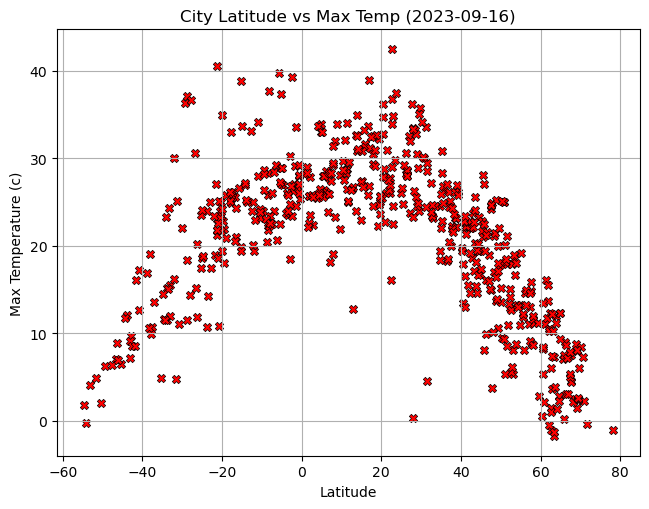

In [100]:
# https://stackoverflow.com/a/75222939/21871037
# title=(f"Latitude vs Max Temp ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})"))

# Build scatter plot for latitude vs. temperature
build_scatter("Lat", "Max Temp")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.title(f"City Latitude vs Max Temp ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

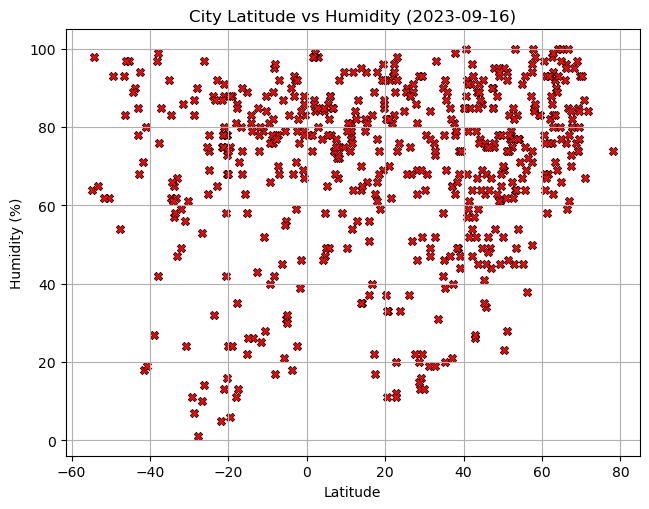

In [101]:
# Build the scatter plots for latitude vs. humidity
build_scatter("Lat", "Humidity")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

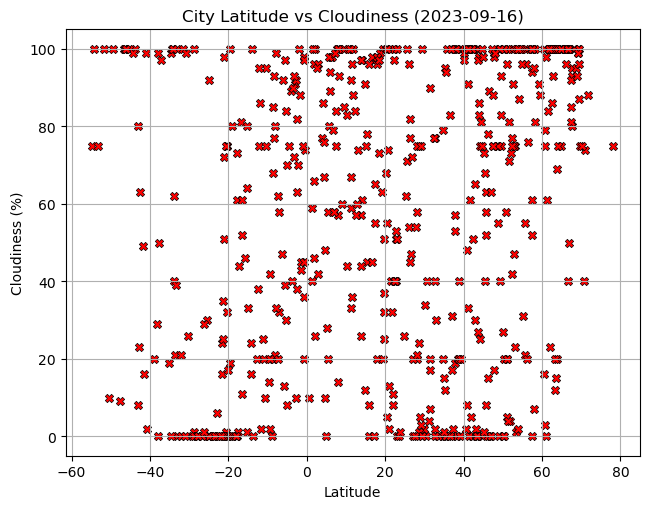

In [102]:
# Build the scatter plots for latitude vs. cloudiness
build_scatter("Lat", "Cloudiness")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

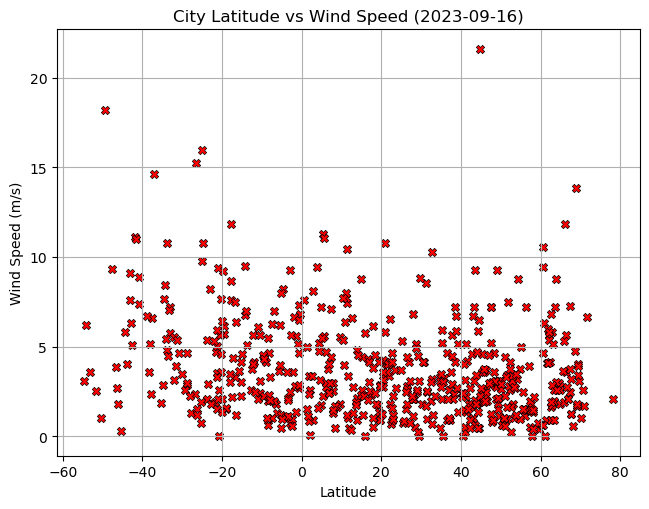

In [103]:
# Build the scatter plots for latitude vs. wind speed
build_scatter("Lat","Wind Speed")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [110]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,barcelos,41.5388,-8.6151,22.14,85,61,4.19,PT,1694887125
2,kodiak,57.7900,-152.4072,8.73,100,100,0.00,US,1694887126
3,turpan,42.9333,89.1667,23.71,26,30,1.03,CN,1694887126
4,oppdal,62.5943,9.6912,6.02,98,100,1.64,NO,1694887126
5,albany,42.6001,-73.9662,21.99,57,100,1.79,US,1694887126


In [114]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port douglas,-16.4833,145.4667,20.97,74,11,6.36,AU,1694887125
8,puerto ayora,-0.7393,-90.3518,27.98,86,98,2.68,EC,1694887127
9,pontes e lacerda,-15.2261,-59.3353,38.76,22,1,3.04,BR,1694887110
10,waitangi,-43.9535,-176.5597,12.12,90,100,4.02,NZ,1694887127
11,new norfolk,-42.7826,147.0587,9.72,68,23,6.31,AU,1694887127


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


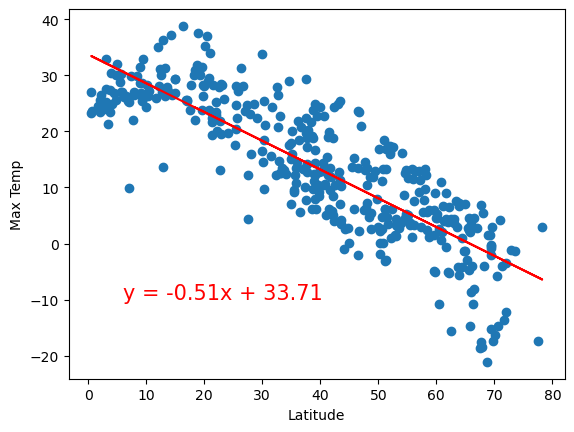

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


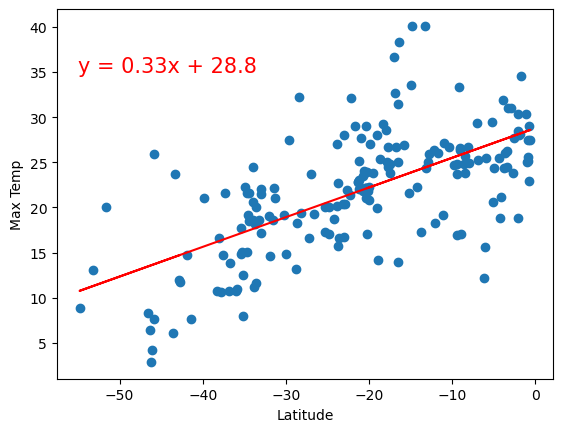

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


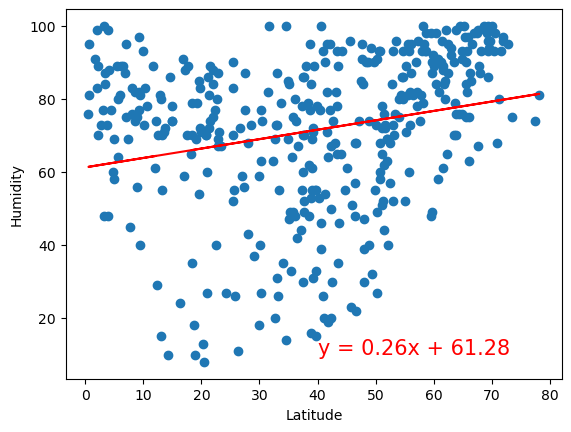

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


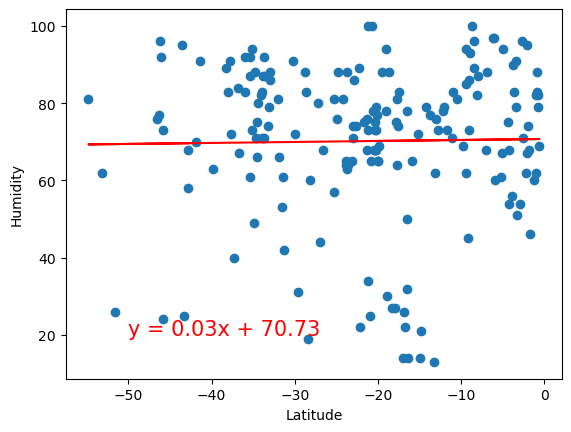

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


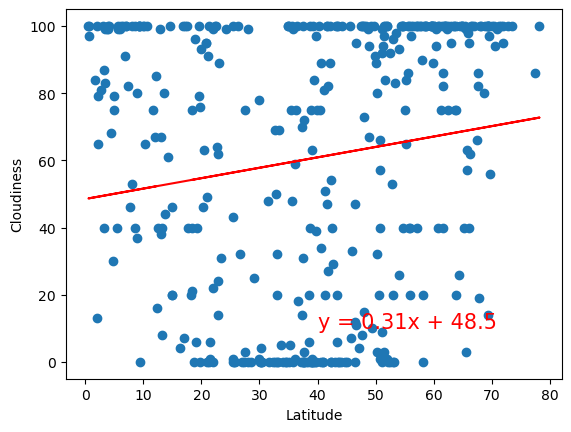

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


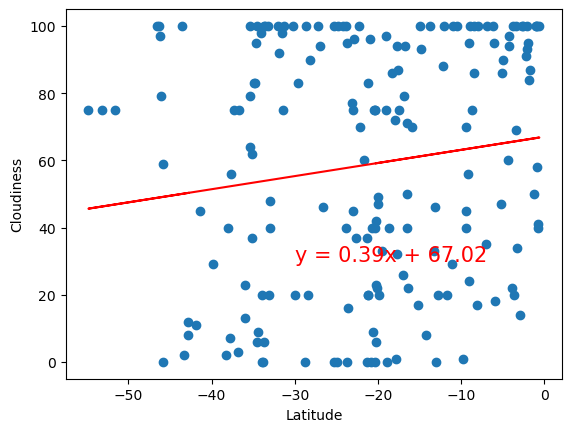

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


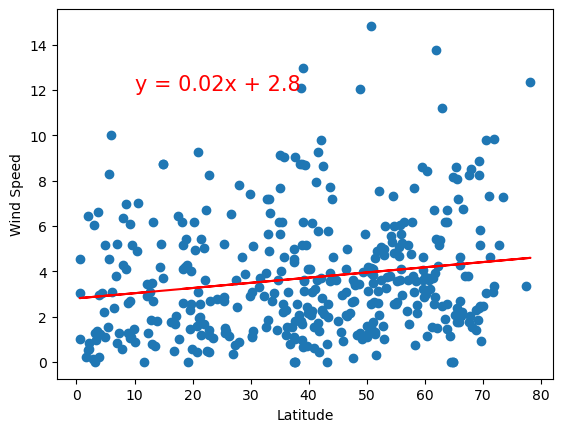

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


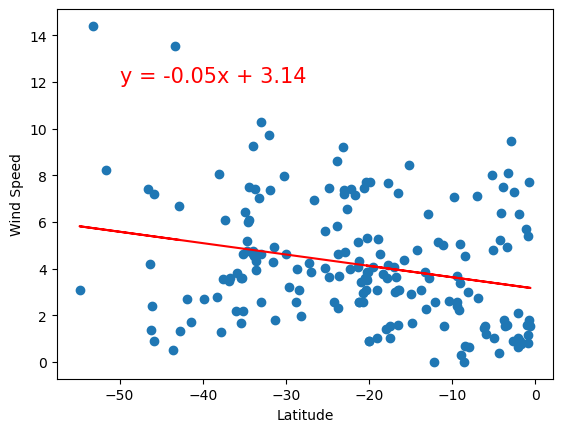

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE